# 1次元入力2クラス分類

分類問題を扱う．

分類問題では，目標データが**クラス**である．

**クラス**とは，整数を割り振ることができるけど，その整数自体に意味はないものを指す．

例えば，{0: 果実, 1: 野菜, 2: 穀物}

**確率**の概念を導入することで，予測の「不確かさ」を定量化して扱うことができる．

 ## 6.1 1次元入力2クラス分類

### 6.1.1 問題設定

1次元の**入力変数**を$x_n$で表し，その**目標変数**を$t_n$とする．

$
X=
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{N-1}
\end{bmatrix}
,\quad
T=
\begin{bmatrix}
t_0 \\
t_1 \\
\vdots \\
t_{N-1}
\end{bmatrix}
$

ある昆虫のN匹のデータを考える．

それぞれの重量$x_n$，性別を$t_n$とする．

$t_n$は，0か1を取り，0であればメス，1であればオスとする．

**目的は，このデータを元に，重量から性別を予測するモデルを作成することである．**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=0)
X_min=0
X_max=2.5
X_n=30
X_col=['cornflowerblue','gray']
X=np.zeros(X_n)
T=np.zeros(X_n,dtype=np.uint8)
Dist_s=[0.4,0.8]
Dist_w=[0.8,1.6]
Pi=0.5

for n in range(X_n):
    wk=np.random.rand()
    T[n]=0*(wk<Pi)+1*(wk>=Pi)
    X[n]=np.random.rand()*Dist_w[T[n]]+Dist_s[T[n]]

In [3]:
print('X='+str(np.round(X,2)))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]


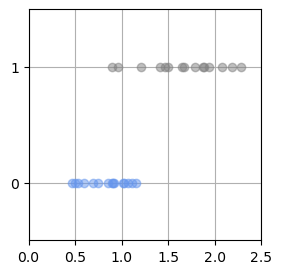

In [4]:
def show_data1(x,t):
    K = np.max(t)+1
    for k in range(K):
        plt.plot(x[t==k],t[t==k],X_col[k],alpha=0.5,linestyle='none',marker='o')
    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])
    
fig = plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()

ある昆虫の重量と雌雄の人口データ(30匹分)

今回の問題を解くための方針として，オスとメスを分ける境界線を決める．これを**決定境界**(decision boundary)という．

第５章で扱った，線形回帰モデルでは，うまくいかないため，ここからは確率の概念を導入する．

### 6.1.2 確率で表すクラス分布

今回のデータでは，質量$x < 0.8g$の時，確実にメスであり，
$1.2g < x$の時は，確実にオスといえる．

よって，$0.8g < x < 1.2g$の範囲では，100%の予測はできない．

しかし，今回は人口データとして分布を把握しているため，
結論からいうと，その範囲では，「オスである確率は1/3である」ということが，あいまいさを確率として含めた予測ができる．

このように，xに対する$t=1$(オス)である確率は，**条件付き確率**を用いて，$P(t=1|x)$と表す．

### 6.1.3 最尤推定

先の例では，$0.8 < x \leq 1.2$の時，$P(t=1|x)=1/3$であることを真の分布から解析的に見積もった．

しかし，実際には，データから推測すべき．

例えば，$0.8 < x \leq 1.2$の範囲にある$t$に着目すると0,0,0,1だったとする．
この情報から，$0.8 < x \leq 1.2$での，$P(t=1|x)$を推定する．

はじめに，$$P(t=1|x)=w$$という単純なモデルを考える．単純に考えると，$t=1$は１回しかないので，$w=1/4$となりそうだが，
一般的に最尤推定で求める．

まず，「クラスデータT=0,0,0,1がモデルから生成された確率」を考える．これを，尤度という．

例えば，$w=0.1$の時，$w=P(t=1|x)=0.1$なので，尤度は，$0.9^3 \times 0.1=0.0729$となり，

同様に，$w=0.2$では，尤度は，$0.1024$となった．

この時尤度が高い，$w=0.2$の方がもっともらしい言える．

次に，0から1の間で尤度がもっとも大きくなる時を解析的に求める．

$$P(T=0,0,0,1|x)=(1-w)^3 \times w \quad(1)$$

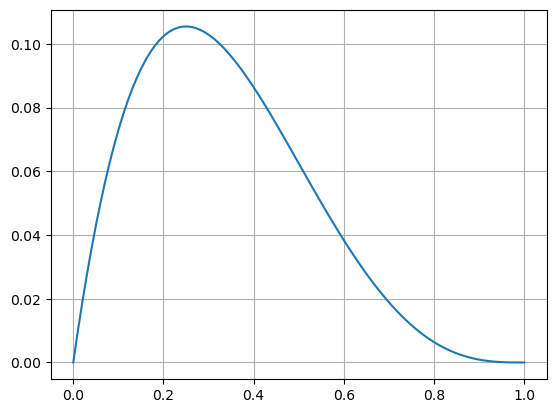

In [5]:
x=np.linspace(0,1,100)
y=(1-x)**3*x
plt.plot(x,y)
plt.grid(True)
plt.show()

プロットすると約$w=0.25$で最大を取ることが確認できる．

次に数値計算で確認する．

式(1)の両辺の対数を取ると，
$$
\log P = \log {(1-w)^3w} = 3\log (1-w) + \log w \quad (2)
$$

対数は単調増加のため，Pを最大にするwと$\log P$を最大にするwは変わらない．

式(2)の両辺を微分して，
$$
\frac{d}{dw} \log P = \frac{d}{dw}[3 \log (1-w)+\log w]
$$

これが=0になればいいので，
$$
3\frac{-1}{1-w}+\frac{1}{w}=0\quad(3)
$$

$0<w<1$の範囲では，式(3)の分母$\neq 0$なので，
$$
-3w+1-w=0
$$

よって，
$$
w=\frac{1}{4}
$$

これが，wの最尤推定値である．

### 6.1.4 ロジスティック回帰モデル

これまでは，データを一様分布から生成されたものと考えたが，実際にはそうなることはあまりない．
たとえば，体重と身長のばらつきは，ガウス分布でよく近似できることが知られている．

以下では，人口データがガウス分布に従っているとして，議論する．

この仮定では，条件付き確率$P(t=1|x)$は，**ロジスティック回帰モデル**に従うことがわかっている．

ロジスティック回帰モデルでは，以下のように直線の式をシグモイド関数に入れた形である．

$$
y=w_0x+w_1 \\
y=\sigma(w_0x+w_1)=\frac{1}{1+\exp\{-(w_0x+w_1)\}}
$$

こうすることで，直線の値は，0から1の間に押し込められる．

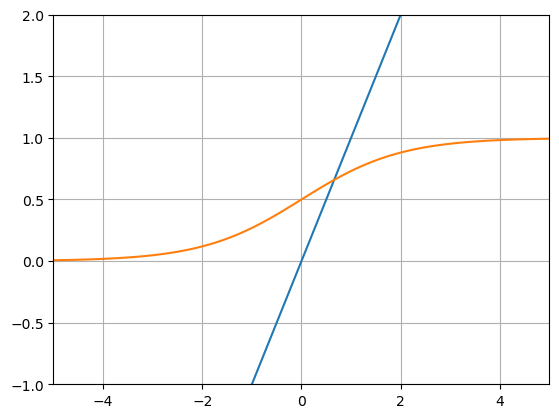

In [6]:
x=np.linspace(-5,5,100)
y=x
plt.plot(x,y)
s=1/(1+np.exp(-(y)))
plt.plot(x,s)
plt.grid(True)
plt.ylim(-1,2)
plt.xlim(-5,5)
plt.show()

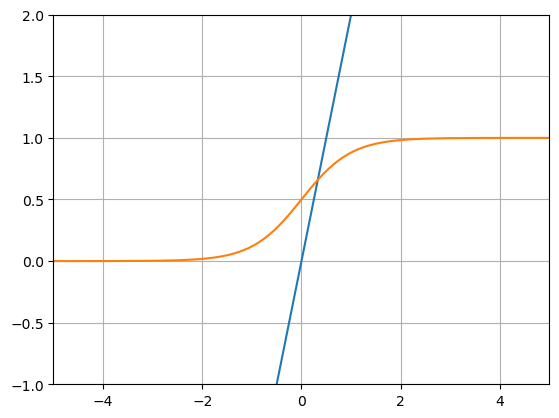

In [7]:
x=np.linspace(-5,5,100)
y=2*x
plt.plot(x,y)
s=1/(1+np.exp(-(y)))
plt.plot(x,s)
plt.grid(True)
plt.ylim(-1,2)
plt.xlim(-5,5)
plt.show()

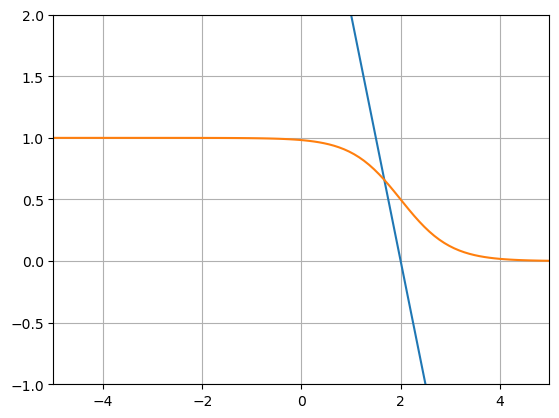

In [8]:
x=np.linspace(-5,5,100)
y=-2*x+4
plt.plot(x,y)
s=1/(1+np.exp(-(y)))
plt.plot(x,s)
plt.grid(True)
plt.ylim(-1,2)
plt.xlim(-5,5)
plt.show()

In [9]:
def logistic(x,w):
    y=1/(1+np.exp(-(w[0]*x+w[1])))
    return y

In [10]:
def show_logistic(w):
    xb=np.linspace(X_min,X_max,100)
    y=logistic(xb,w)
    plt.plot(xb,y,color='gray',linewidth=4)
    # 決定境界
    i=np.min(np.where(y>0.5))
    B=(xb[i-1]+xb[i])/2
    plt.plot([B,B],[-.5,1.5],color='k',linestyle='--')
    plt.grid(True)
    return B

In [11]:
W=[8,-10] # y=8x-10

1.25

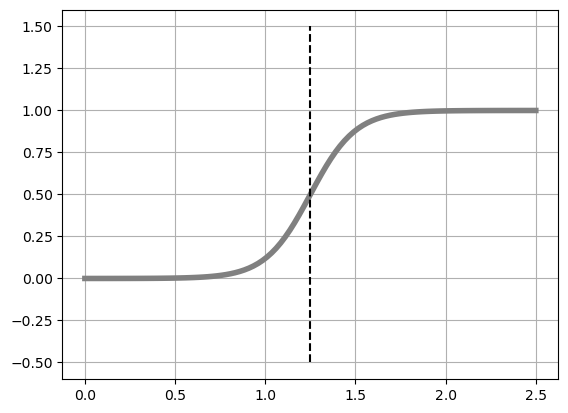

In [12]:
show_logistic(W) #t=0.5の位置に決定境界を引く

### 6.1.5 交差エントロピー誤差

ロジスティック回帰モデルを用いて，xがt=1となる確率を以下のようにする．
$$
y=\sigma (w_0x+w_1)=P(t=1|x)
$$

次に，パラメータ$w_0とw_1$が昆虫のデータをに合うように最尤推定する．
「このモデルから昆虫のデータが生成されたとして，最もありえるパラメータを求める．」という方針．

データが一つだけだとして，ある重量xに対する，yをロジスティック回帰モデルの出力値とすると，クラスの生成確率は
$$
P(t|x)=y^t(1-y)^{1-t}
$$

データがN個の場合は，1つ1つの生成確率を掛け算すればいいので，
$$
P(X|T)=\prod^{N-1}_{n=0}P(t_n|x_n)=\prod^{N-1}_{n=0}y_n^{t_n}(1-y_n)^{1-t_n}
$$

両辺の対数をとって，
$$
\log P(T|X)=\sum^{N-1}_{n=0}\{t_n\log y_n+(1-t_n)\log (1-y_n)\}\quad(4)
$$

この対数尤度が最大となるような，w_0,w_1を求める．

ただし，今まで平均二乗誤差が最小になるように，パラメータを求めていたので，それと合わせて，式(4)に-1をかけて，最小値を求めることとする．

これを，**交差エントロピー誤差**と呼ぶ．

さらに，交差エントロピー誤差をNで割った，**平均交差エントロピー誤差**を$E(w)$として定義する．

$$
E(w)=-\frac{1}{N}\log P(T|X)=-\frac{1}{N}\sum^{N-1}_{n=0}\{t_n\log y_n+(1-t_n)\log (1-y_n)\}\quad(5)
$$

In [13]:
# 平均交差エントロピー誤差

def cee_logistic(w,x,t):
    y=logistic(x,w)
    cee=0
    for n in range(len(y)):
        cee=cee-(t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee=cee/X_n
    return cee

In [14]:
W=[1,1]
cee_logistic(W,X,T)

1.0288191541851066

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
wn=80
w_range=np.array([[0,15],[-15,0]])
w0=np.linspace(w_range[0,0],w_range[0,1],wn)
w1=np.linspace(w_range[1,0],w_range[1,1],wn)
ww0,ww1=np.meshgrid(w0,w1)
C=np.zeros((len(w1),len(w0)))
w=np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0]=w0[i0]
        w[1]=w1[i1]
        C[i1,i0]=cee_logistic(w,X,T)

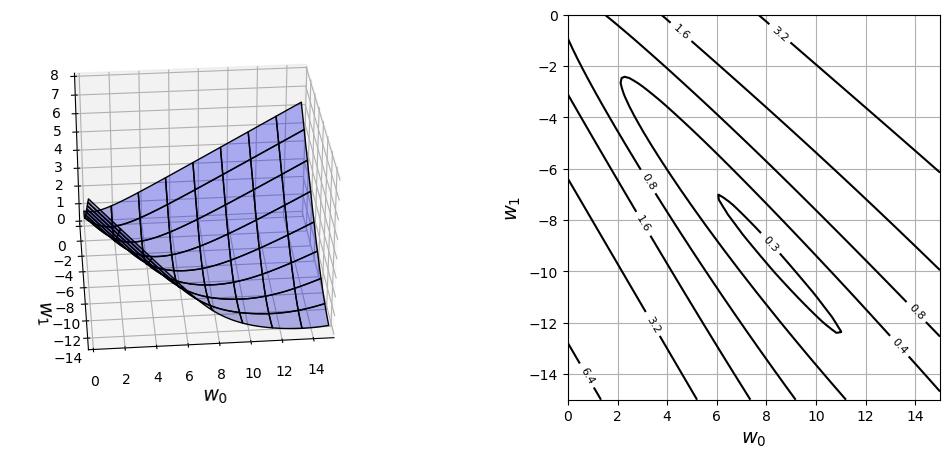

In [17]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0,ww1,C,color='blue',edgecolor='black',
               rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont=plt.contour(ww0,ww1,C,20,colors='black',
                 levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%.1f',fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()

等高線表示で確認すると，$w_0=9,w_1=-9$の付近に最小値があると予想できる．

### 6.1.6 学習則の導出

交差エントロピー誤差が最小になるパラメータを解析的に求めることはできていない．
これは，$y_n$に非線形のシグモイド関数が含まれているためである．
そこで，勾配法を用いて，数値的に導出する．勾配法を用いるには，パラメータの偏微分が必要である．

式(5)を以下のように表す．
$$
E(w)=\frac{1}{N}\sum^{N-1}_{n=0}E_n(w)
$$

ただし，
$$
E_n(w)=-t_n\log y_n-(1-t_n)\log (1-y_n)\quad(6)
$$

$w_0$で偏微分すると，
$$
\frac{\partial}{\partial w_0}E(w)=\frac{1}{N}\frac{\partial}{\partial w_0}\sum^{N-1}_{n=0}E_n(w)=
\frac{1}{N}\sum^{N-1}_{n=0}\frac{\partial}{\partial w_0}E_n(w)
$$

ここで，$\frac{\partial}{\partial w_0}E_n(w)$を先に求める．

式(6)より，$\sum$の中身の$y_n$はロジスティック回帰モデルの出力だが，のちのちの計算のために，
$$
a_n=w_0x+w_1
$$

として，これを入力総和と呼ぶ．

$$
y_n=\sigma(a_n)=\frac{1}{1+\exp(-a_n)}
$$

$w_0$で偏微分するために，連鎖律の公式を用いる．
$$
\frac{\partial E_n}{\partial w_0}=
\frac{\partial E_n}{\partial y_n}\cdot 
\frac{\partial y_n}{\partial a_n}\cdot
\frac{\partial a_n}{\partial w_0}
$$

$\frac{\partial E_n}{\partial y_n}$は，式(6)を$y_n$で偏微分したものなので，
$$
\frac{\partial E_n}{\partial y_n}=\frac{\partial}{\partial y_n}\{-t_n\log y_n-(1-t_n)\log (1-y_n)\}\\
=-t_n\frac{\partial}{\partial y_n}\log y_n-(1-t_n)\frac{\partial}{\partial y_n}\log(1-y_n)
$$

よって，
$$
\frac{\partial E_n}{\partial y_n}=-\frac{t_n}{y_n}+\frac{1-t_n}{1-y_n}
$$

次に$\frac{\partial y_n}{\partial a_n}$は，シグモイド関数の微分の公式を用いて，
$$
\frac{\partial y_n}{\partial a_n}=\frac{\partial}{\partial a_n}\sigma(a_n)=\sigma(a_n)\{1-\sigma(a_n)\}=y_n(1-y_n)
$$

最後に，$\frac{\partial a_n}{\partial w_0}$は簡単に，
$$
\frac{\partial a_n}{\partial w_0}=\frac{\partial}{\partial w_0}(w_0x_n+w_1)=x_n
$$

よって，
$$
\frac{\partial E_n}{\partial w_0}=(-\frac{t_n}{y_n}+\frac{1-t_n}{1-y_n})y_n(1-y_n)x_n\\
=\{-t_n(1-y_n)+(1-t_n)y_n\}x_n\\
=(y_n-t_n)x_n
$$

結果として，
$$
\frac{\partial E}{\partial w_0}=\frac{1}{N}\sum^{N-1}_{n=0}(y_n-t_n)x_n
$$

同様にして，$w_1$も，
$$
\frac{\partial E}{\partial w_1}=\frac{1}{N}\sum^{N-1}_{n=0}(y_n-t_n)
$$

In [18]:
def dcee_logistic(w,x,t):
    y=logistic(x,w)
    dcee=np.zeros(2)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n])*x[n]
        dcee[1]=dcee[1]+(y[n]-t[n])
    dcee=dcee/X_n
    return dcee

In [19]:
W=[1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

### 6.1.7 勾配法による解

In [20]:
from scipy.optimize import minimize

In [21]:
def fit_logistic(w_init,x,t):
    res1=minimize(cee_logistic,w_init,args=(x,t),
                 jac=dcee_logistic,method='CG')
    return res1.x

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


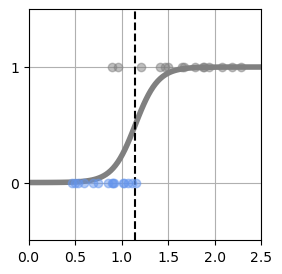

In [22]:
plt.figure(1,figsize=(3,3))
W_init=[1,-1]
W=fit_logistic(W_init,X,T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0],W[1]))
B=show_logistic(W)
show_data1(X,T)
plt.ylim(-.5,1.5)
plt.xlim(X_min,X_max)
cee=cee_logistic(W,X,T)
print('CEE = {0:.2f}'.format(cee))
print('Boundary = {0:.2f} g'.format(B))
plt.show()

結果は上記のようになり，決定境界は$1.15$となった．

このモデルの優れているところは，出力の値が，$P(t=1|x)$という条件付き確率を近似しようとしているところであり，
あいまいさも含めて予測している点である．